In [23]:
import matplotlib.pyplot as plt 
%matplotlib inline 
import pandas

from sklearn import preprocessing

from Bio import Phylo, SeqIO

In [24]:
len(list(SeqIO.parse('../alignments/uniq_aln.fa', 'fasta')))

2474

In [25]:
tree = next(Phylo.parse('../alignments/tree.nwk', 'newick'))

In [26]:
import numpy as np 

fake = np.random.rand(2474, 20)

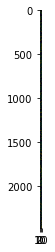

In [27]:
plt.imshow(fake)

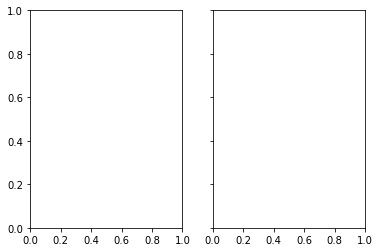

In [28]:
fig, ax = plt.subplots(1, 2, sharey=True)
ax1 = ax[1]
ax1

In [29]:
# lets get some real data 

names = [record.id for record in SeqIO.parse('../alignments/uniq_aln.fa', 'fasta')]

df = pandas.read_hdf('results.h5')
df = df.loc[names].copy().dropna()
print(df.shape)
df.head()

df = df.select_dtypes(['float64'])

scaler = preprocessing.MinMaxScaler()
df = pandas.DataFrame(scaler.fit_transform(df), columns=df.columns, index=df.index)
df.head()

(2393, 60)


,total_score,fa_rep,hbond_sc,all_cst,tot_pstat_pm,tot_nlpstat_pm,tot_burunsat_pm,tot_hbond_pm,tot_NLconts_pm,tot_nlsurfaceE_pm,...,SR_4_nlpstat_pm,SR_5,SR_5_total_score,SR_5_fa_rep,SR_5_hbond_sc,SR_5_all_cst,SR_5_interf_E_1_2,SR_5_dsasa_1_2,SR_5_hbond_pm,SR_5_burunsat_pm
G8TIS3_NIAKG,0.398728,0.066187,0.885322,0.0,0.214286,0.206897,0.535948,0.153005,0.223404,0.084157,...,0.835294,0.333333,0.013916,0.005054,0.983146,0.094158,0.013916,0.984615,0.2,0.833333
Q7NJ29_GLOVI,0.437517,0.117520,0.591974,0.0,0.321429,0.379310,0.477124,0.338798,0.372340,0.060144,...,0.858824,0.453704,0.009194,0.007932,0.921348,0.007866,0.009194,0.984615,0.5,0.500000
A0A0A7LJF4_9BACT,0.418049,0.066954,0.863551,0.0,0.321429,0.275862,0.594771,0.284153,0.308511,0.107541,...,0.611765,0.453704,0.010306,0.007957,0.492509,0.000114,0.010306,0.953846,0.7,0.166667
J7Q7X2_METSZ,0.455488,0.099663,0.875646,0.0,0.500000,0.517241,0.620915,0.131148,0.345745,0.076981,...,0.435294,0.314815,0.011218,0.011160,1.000000,0.033424,0.011224,0.969231,0.2,0.666667
B1ZWE4_OPITP,0.584483,0.163284,0.967125,0.0,0.035714,0.068966,0.450980,0.021858,0.202128,0.091899,...,0.811765,0.324074,0.008120,0.002039,0.820225,0.000239,0.008126,0.907692,0.3,0.000000


In [30]:
plt.rcParams["lines.linewidth"] = 0.5

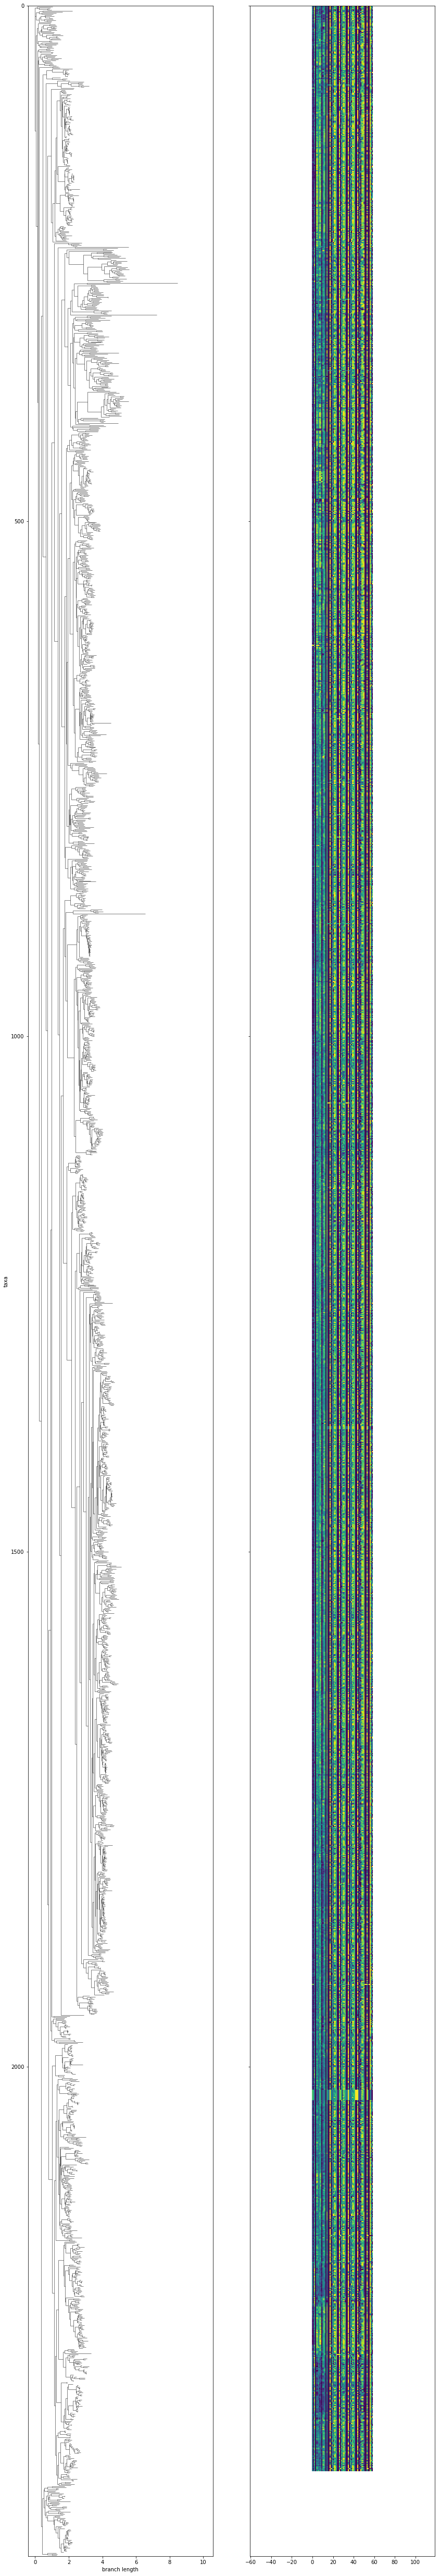

In [31]:
fig, ax = plt.subplots(ncols=2, sharey=True, figsize=(14,90))
ax[1].imshow(df)
Phylo.draw(tree, axes=ax[0], label_func=lambda x: None, show_confidence=False, do_show=False, )
fig.savefig('tree_heatmap.png', dpi=200)